# Análise do covid no Brasil

## Introdução

Esta é uma análise exploratória inicial dos dados do COVID-19 no Brasil.


### Objetivo

O objetivo é entender a distribuição da população contaminada por COVID-19.


### Metodologia

Análisar as features a fim de entendermos as distribuições e suas caracteristicas.
Algumas hipóteses:
- A idade impacta no fator de sobrevivência


### Resultado Esperado

Espera-se verificar se fatores como idade, sexo e fatores de risco contribuem para complicação da doença.


## Base de Dados

Foi utilizado dados abertos disponíveis em [https://opendatasus.saude.gov.br/dataset/bd-srag-2020](https://opendatasus.saude.gov.br/dataset/bd-srag-2020) com a data de 18/05/2020.

Esta base é disponibilizada pelo ***Vigilância de Síndrome Respiratória Aguda Grave (SRAG)***. O SRAG é um programa da Secretaria de Vigilância em Saúde (SVS).

O Dicionário com o significado de cada uma das colunas esta localizado [Aqui](https://opendatasus.saude.gov.br/dataset/9bc2013f-f293-4f3e-94e7-fa76204fc035/resource/20e51b77-b129-4fd5-84f6-e9428ab5e286/download/dicionario_de_dados_srag_hospitalizado_atual-sivepgripe.pdf)

**Um ponto importante** é que os casos que constam nesta base são os casos mais severos e que necessitaram de atendimento médico. Conforme a recomendação do Ministério da Saúde para a população, os casos com sintomas não tão severos recomendava-se a não ir no pronto atendimento. Ou seja, é importante ter em mente que esses dados não representam a real situação da doença no Brasil, e sim uma amostra.

## Análise da Base e das Características

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = 20
sns.set(style="whitegrid")

In [3]:
# Nao esquecer de descompactar a base de dados

file_name = 'data/INFLUD-23-06-2020.csv'

# df_full = pd.read_csv(file_name, sep=';', engine='c', encoding='utf8', error_bad_lines=False, low_memory=False)
df_full = pd.read_csv(file_name, sep=';', engine='c', encoding='ISO-8859-1',error_bad_lines=False, low_memory=False)

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326193 entries, 0 to 326192
Columns: 134 entries, DT_NOTIFIC to PAC_DSCBO
dtypes: float64(76), int64(10), object(48)
memory usage: 333.5+ MB


### Removendo um pouco das colunas
A base possui muitas colunas (+130), e ao analisar o Dicionário de dados, notei que muitas delas não serão úteis para análise da população do COVID. Vamos ler o documento de Discionário e fazer uma filtragem em alto nível de quais colunas serão retiradas.

In [5]:
# cols_to_drop = ['CS_ETINIA', 'ID_PAIS', 'ID_RG_RESI', 'CO_RG_RESI', 'AVE_SUINO', 'NOSOCOMIAL', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE', 'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'ANTIVIRAL', 'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'RAIOX_RES', 'RAIOX_OUT', 'DT_RAIOX', 'AMOSTRA', 'DT_COLETA', 'TP_AMOSTRA', 'OUT_AMOST', 'REQUI_GAL', 'DT_IF', 'POS_IF_FLU', 'TP_FLU_IF', 'POS_IF_OUT', 'IF_VSR', 'IF_PARA1', 'IF_PARA2', 'IF_PARA3', 'IF_ADENO', 'IF_OUTRO', 'DS_IF_OUT', 'LAB_IF', 'CO_LAB_IF', 'PCR_RESUL', 'DT_PCR', 'TP_FLU_PCR', 'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT', 'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO', 'CO_UN_INTE', 'NM_UN_INTE', 'OBSERVA',]
cols_to_drop = ['CS_ETINIA', 'ID_PAIS', 'ID_RG_RESI', 'CO_RG_RESI', 'AVE_SUINO', 'NOSOCOMIAL', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE', 'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'ANTIVIRAL', 'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'RAIOX_RES', 'RAIOX_OUT', 'DT_RAIOX', 'AMOSTRA', 'DT_COLETA', 'TP_AMOSTRA', 'OUT_AMOST', 'DT_IF', 'POS_IF_FLU', 'TP_FLU_IF', 'POS_IF_OUT', 'IF_VSR', 'IF_PARA1', 'IF_PARA2', 'IF_PARA3', 'IF_ADENO', 'IF_OUTRO', 'DS_IF_OUT', 'PCR_RESUL', 'DT_PCR', 'TP_FLU_PCR', 'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT', 'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO',]
df_clean = df_full.drop(cols_to_drop, axis=1)

In [6]:
df_clean.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326193 entries, 0 to 326192
Columns: 69 entries, DT_NOTIFIC to DT_DIGITA
dtypes: float64(39), int64(9), object(21)
memory usage: 171.7+ MB


In [7]:
df_clean.sample(4)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DT_SAIDUTI,SUPORT_VEN,IF_RESUL,POS_PCRFLU,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA
319067,12/06/2020,24,08/06/2020,24,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL DAS CLINICAS DA UNICAMP DE CAMPINAS,...,00000000,1.0,4.0,2.0,5.0,1.0,NaN,00000000,22/06/2020,22/06/2020
246931,08/06/2020,24,25/05/2020,22,RJ,NaN,NaN,NITEROI,330330,SES RJ HOSPITAL ESTADUAL AZEVEDO LIMA,...,00000000,1.0,5.0,NaN,NaN,NaN,NaN,00000000,00000000,09/06/2020
50023,15/04/2020,16,14/04/2020,16,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,CONJUNTO HOSPITALAR DO MANDAQUI SAO PAULO,...,07/05/2020,1.0,NaN,NaN,5.0,1.0,2.0,07/05/2020,21/04/2020,16/04/2020
296189,12/06/2020,24,05/06/2020,23,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSP MAT VIDAS,...,00000000,2.0,5.0,NaN,NaN,NaN,NaN,00000000,00000000,17/06/2020


In [8]:
df = df_clean.copy()

# Mantendo apenas os casos de COVID, embora suspeito que tenha muitos casos de CLASSI_FIN==4 que são COVID.
df = df[df.CLASSI_FIN==5]

In [9]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138305 entries, 2210 to 326190
Columns: 69 entries, DT_NOTIFIC to DT_DIGITA
dtypes: float64(39), int64(9), object(21)
memory usage: 73.9+ MB


### Entendendo um pouco das características

Ao analisar o Dicionario de dados, notei algumas colunas importantes para análise, então as separei em 5 grupos:
* Sintomas
* Fatores de Risco
* Localização
* Informações Pessoais
* Dados da Internação

In [10]:
sintomas_cols = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_DES']
# OUTRO_DES if OUTRO_SIN == 1
df[sintomas_cols].sample(4)

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_DES
162152,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN
266058,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AGEUSIA, ANOSMIA, CEFALEIA"
35201,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,"ALTERACAO OLFATO, MAL ESTAR"
180020,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,MIALGIA


In [11]:
fatores_risco_cols = ['PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'MORB_DESC']
# MORB_DESC if OUT_MORBI == 1
# if OBESIDADE==1 then OBES_IMC is not null
df[fatores_risco_cols].sample(4)

,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,MORB_DESC
68962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221072,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12234,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,RINITE


In [12]:
localizacao_cols = ['SG_UF_NOT', 'ID_MUNICIP', 'ID_UNIDADE', 'CO_PAIS', 'SG_UF', 'ID_MN_RESI', 'CS_ZONA', 'ID_MN_INTE',]
df[localizacao_cols].sample(4)

,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,CO_PAIS,SG_UF,ID_MN_RESI,CS_ZONA,ID_MN_INTE
275939,PI,TERESINA,HOSPITAL UNIMED TERESINA,1,PI,TERESINA,1.0,TERESINA
83966,RJ,RIO DE JANEIRO,SMS COORD DE EMERGENCIA REGIONAL CER CENTRO AP 10,1,RJ,MESQUITA,1.0,RIO DE JANEIRO
83589,SP,SAO PAULO,HOSPITAL BOSQUE DA SAUDE,1,SP,SAO PAULO,1.0,SAO PAULO
110395,TO,PALMAS,HOSPITAL GERAL DE PALMAS DR FRANCISCO AYRES,1,TO,BARROLANDIA,1.0,PALMAS


In [13]:
info_p_cols = ['CS_SEXO', 'DT_NASC', 'NU_IDADE_N', 'TP_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N']
df[info_p_cols].sample(4)

,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N
240296,M,13/02/1947,73,3,6,4.0,NaN
57696,M,01/01/1961,59,3,6,1.0,3.0
167614,F,05/01/1983,37,3,5,1.0,9.0
107220,M,11/05/1989,30,3,6,1.0,2.0


In [14]:
internacao_cols = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'UTI', 'DT_ENTUTI', 'DT_SAIDUTI', 'SUPORT_VEN', 'IF_RESUL', 'POS_PCRFLU', 'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA']
df[internacao_cols].sample(4)

,DT_NOTIFIC,DT_SIN_PRI,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,IF_RESUL,POS_PCRFLU,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA
216233,27/05/2020,22/05/2020,27/05/2020,2.0,00000000,00000000,3.0,4.0,2.0,5.0,1.0,1.0,06/06/2020,06/06/2020,02/06/2020
10180,19/03/2020,14/03/2020,18/03/2020,NaN,00000000,00000000,3.0,9.0,NaN,5.0,1.0,NaN,00000000,08/04/2020,25/03/2020
193547,28/05/2020,20/05/2020,27/05/2020,2.0,00000000,00000000,2.0,2.0,NaN,5.0,1.0,1.0,03/06/2020,05/06/2020,28/05/2020
289007,13/06/2020,01/06/2020,13/06/2020,1.0,18/06/2020,00000000,2.0,5.0,NaN,5.0,1.0,NaN,00000000,00000000,17/06/2020


## Entendendo as caracteristicas e criando hipóteses

Nesta etapa vamos dar uma olhada melhor nas colunas e bolar algumas hipóteses, afim de alcançar o objetivo desta análise.

## > CLASSI_FIN

A variável CLASSI_FIN que representa a classificação final da Doença. De acordo com o dicionário de dados temos os possíveis valores:
1. SRAG por influenza
2. SRAG por outro vírus respiratório
3. SRAG por outro agente Etiológico, qual:
4. SRAG não especificado
5. COVID-19

Vamos analisar o comportamento desta variável antes e Após a pandemia de covid.

In [15]:
# Usando df_clean pois nela que temos a distribuição completa contendo todos os valores desta variável. 
# Após será usado apenas a variável df

df_clean.groupby('CLASSI_FIN').CLASSI_FIN.count()

CLASSI_FIN
1.0      2170
2.0      2252
3.0       749
4.0    104867
5.0    138305
Name: CLASSI_FIN, dtype: int64

In [16]:
# pegando o primeiro caso de covid no Brasil
df_clean[df_clean.CLASSI_FIN == 5].sort_values(by='DT_NOTIFIC').DT_NOTIFIC.head(1)

40175    01/03/2020
Name: DT_NOTIFIC, dtype: object

In [17]:
df_clean[df_clean.DT_NOTIFIC < "01/03/2020"].DT_NOTIFIC.count()

28

Estranho haver apenas 28 casos antes da data de 01/03/2020. Acredito que a base não está completa. As bases do começo do mes de junho traziam as SRAGs anteriores.
Vamos olhar esta variável para entender os casos de CLASSI_FIN == 4, pois acredito que muitos desses casos são covids.

In [18]:
df_clean[df_clean.CLASSI_FIN == 4].sample(4)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DT_SAIDUTI,SUPORT_VEN,IF_RESUL,POS_PCRFLU,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA
135983,14/05/2020,20,13/05/2020,20,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL INFANTIL PEQUENO PRINCIPE,...,00000000,3.0,4.0,NaN,4.0,1.0,1.0,17/05/2020,19/05/2020,14/05/2020
227836,04/06/2020,23,22/05/2020,21,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL ISRAELITA ALBERT EINSTEIN,...,22/05/2020,2.0,9.0,NaN,4.0,1.0,1.0,02/06/2020,17/06/2020,04/06/2020
121757,02/05/2020,18,28/04/2020,18,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260,HOSPITAL E PRONTO SOCORRO DR ARISTOTELES PLATA...,...,00000000,2.0,5.0,NaN,4.0,1.0,2.0,02/05/2020,11/05/2020,11/05/2020
90998,01/05/2020,18,23/04/2020,17,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260,HOSPITAL E PRONTO SOCORRO DA ZONA NORTE DELPHI...,...,00000000,2.0,4.0,NaN,4.0,1.0,2.0,09/05/2020,18/05/2020,02/05/2020


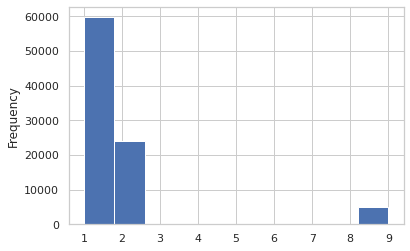

In [19]:
df_clean[(df_clean.CLASSI_FIN == 4) & (df_clean.EVOLUCAO.isin([1,2,9]))].EVOLUCAO.map(lambda x: 9 if x not in (1, 2, 9) else x).plot.hist()

Não está claro se estes dados são Covid ou Não. Por este motivo vamos desconsiderar eles em nossa análise. Vamos considerar apenas os casos que de fato foram classificados como Covid.

### > IDADE

O primeiro fator de risco apontado pelas notícias é a idade. Então vamos entender um pouco sobre

In [20]:
# Mantendo apenas os casos de COVID, embora suspeito que tenha muitos casos de CLASSI_FIN==4 que são COVID.
df = df_clean.copy()
df = df[df.CLASSI_FIN==5]

In [21]:
df.NU_IDADE_N.describe()

count    138305.000000
mean         58.387144
std          18.847702
min           0.000000
25%          45.000000
50%          59.000000
75%          73.000000
max         136.000000
Name: NU_IDADE_N, dtype: float64

(0.0, 110.0)

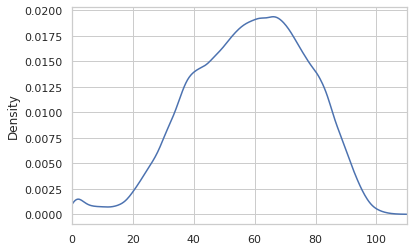

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1)
df.NU_IDADE_N.plot.kde(ax=ax)
ax.set_xlim(0,110)

In [23]:
df.groupby('EVOLUCAO').NU_IDADE_N.describe()

,count,mean,std,min,25%,50%,75%,max
EVOLUCAO,,,,,,,,
1.0,56156.0,52.009919,17.804545,0.0,40.0,52.0,65.0,136.0
2.0,48776.0,67.931011,16.034870,0.0,58.0,70.0,80.0,114.0
9.0,5677.0,53.909988,18.285589,0.0,41.0,55.0,67.0,103.0


'ax=ax'

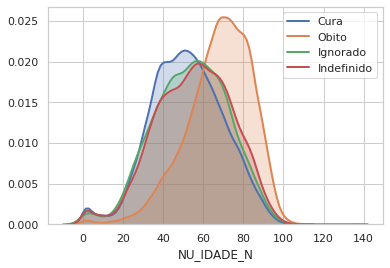

In [24]:
sns.distplot(df[df.EVOLUCAO == 1].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Cura')
sns.distplot(df[df.EVOLUCAO == 2].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Obito')
sns.distplot(df[df.EVOLUCAO == 9].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Ignorado')
sns.distplot(df[~df.EVOLUCAO.isin([1, 2, 9])].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Indefinido')
, ax=ax

In [25]:
df.loc[:, 'IDADE_BINS'] = df.NU_IDADE_N.map(lambda age: 10 * (age // 10))
df.loc[:, 'EVOLUCAO_BINS'] = df.EVOLUCAO.map(lambda x: 9 if x not in (1, 2, 9) else x).map({1:'Cura', 2:'Obito', 9:'Indefinido'})

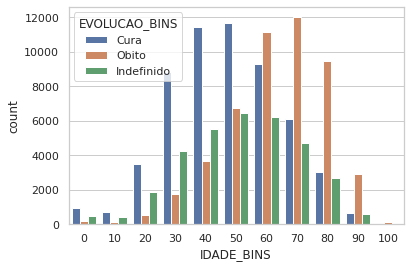

In [26]:
sns.countplot('IDADE_BINS',hue='EVOLUCAO_BINS',data=df[df.IDADE_BINS <= 100])

In [27]:
idade_m_evol1 = df[df.EVOLUCAO == 1].NU_IDADE_N.mean()
idade_m_evol2 = df[df.EVOLUCAO == 2].NU_IDADE_N.mean()

print(f"A idade media para quem se curou é de {idade_m_evol1:.2f} enquanto a a media para óbito é de {idade_m_evol2:.2f}")
print("Aparentemente a IDADE é um fator que divide bem a Evolução do COVID, com uma diferencia das médias entre {0:.2f}".format(abs(idade_m_evol1 - idade_m_evol2)))

A idade media para quem se curou é de 52.01 enquanto a a media para óbito é de 67.93
Aparentemente a IDADE é um fator que divide bem a Evolução do COVID, com uma diferencia das médias entre 15.92


### > SINTOMAS (sintomas_cols)

Analisaremos os Sintomas e tentaremos entender algumas informações
* Qual o sintoma mais presente nos casos de covid (independente da evolução)
* Se existe algum sintoma esta presente mais nos casos de Óbito do que de Cura.

Existem muitos pacientes que não reportaram os sintomas, então para está análise vamos considerar apenas os que reportaram.

Valores possíveis de acordo com o Dicionário de Dados:
1. Sim
2. Não
9. Ignorado

In [28]:
# Mantendo apenas os casos de COVID, embora suspeito que tenha muitos casos de CLASSI_FIN==4 que são COVID.
df = df_clean.copy()
df = df[df.CLASSI_FIN==5]

In [29]:
print("Usaremos as seguintes colunas para este análise:")
print(*sintomas_cols, sep=", ")

Usaremos as seguintes colunas para este análise:
FEBRE, TOSSE, GARGANTA, DISPNEIA, DESC_RESP, SATURACAO, DIARREIA, VOMITO, OUTRO_DES


In [30]:
df.loc[:, sintomas_cols].shape
# 138305 linhas

(138305, 9)

In [31]:
df.loc[:, sintomas_cols] = df.loc[:, sintomas_cols].fillna(9.0)
df.loc[:, sintomas_cols].sample(4)

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_DES
250871,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9
235506,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9
155090,1.0,1.0,9.0,1.0,9.0,1.0,9.0,9.0,9
121523,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,9


In [60]:
print(df.groupby('FEBRE').FEBRE.count())
print(df.groupby('TOSSE').FEBRE.count())
print(df.groupby('GARGANTA').FEBRE.count())
print(df.groupby('DISPNEIA').FEBRE.count())

FEBRE
1.0    98240
2.0    24313
9.0    15752
Name: FEBRE, dtype: int64
TOSSE
1.0    103246
2.0     19873
9.0     15186
Name: FEBRE, dtype: int64
GARGANTA
1.0    28295
2.0    70298
9.0    39712
Name: FEBRE, dtype: int64
DISPNEIA
1.0    95380
2.0    26199
9.0    16726
Name: FEBRE, dtype: int64
